**常用的分箱方法：**

有监督：Best-KS、ChiMerge；

无监督：等频、等距、聚类

**关于变量分箱主要分为两大类：有监督型和无监督型**

对应的分箱方法：

A. 无监督：(1) 等宽 (2) 等频 (3) 聚类(如k均值聚类分箱)

B. 有监督：(1) 卡方分箱法(ChiMerge) (2) ID3、C4.5、CART等单变量决策树算法 (3)  信用评分建模的IV最大化分箱 等

基于CART算法对连续变量进行最优分箱

对变量进行分箱,Python中的函数pd.cut和pd.qcut

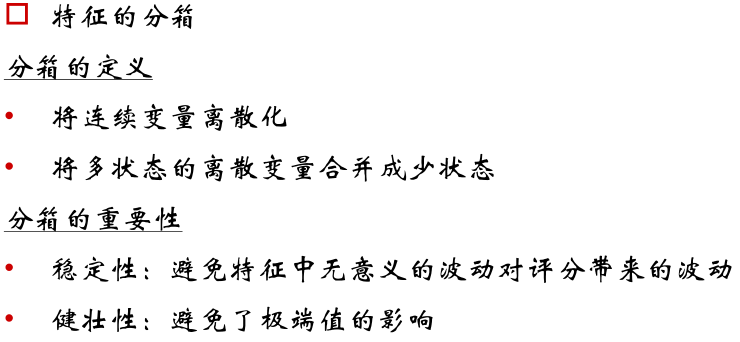

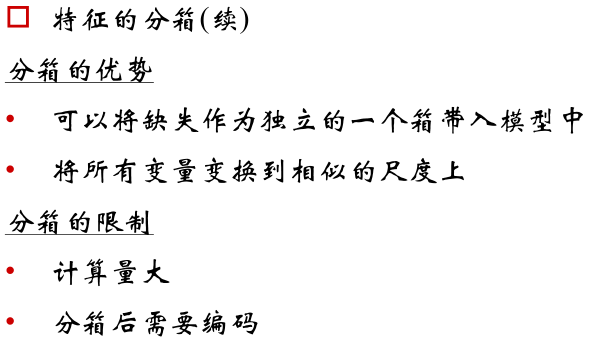

**对变量进行分箱**,Python中的函数pd.cut和pd.qcut

# pd.cut

- **pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False)**

参数：

x : 输入待cut的一维数组

bins : cut的段数，一般为整型，但也可以为序列向量。

right : 布尔值，确定右区间是否开闭，取True时右区间闭合

labels : 数组或布尔值，默认为None，用来标识分后的bins，长度必须与结果bins相等，返回值为整数或者对bins的标识

retbins : 布尔值，可选。是否返回数值所在分组，Ture则返回

precision : 整型，bins小数精度，也就是数据以几位小数显示

include_lowest : 布尔类型，是否包含左区间


In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(666)
score_list = np.random.randint(25, 100, size=20)
print(score_list)

[27 70 55 87 95 98 55 61 86 76 85 53 39 88 41 71 64 94 38 94]


In [3]:
bins = [0, 59, 70, 80, 100]
score_cut = pd.cut(score_list, bins)
print(type(score_cut)) 

<class 'pandas.core.arrays.categorical.Categorical'>


**等宽分箱**

In [4]:
cut2=pd.cut(score_list,3)
print(cut2)

[(26.929, 50.667], (50.667, 74.333], (50.667, 74.333], (74.333, 98.0], (74.333, 98.0], ..., (50.667, 74.333], (50.667, 74.333], (74.333, 98.0], (26.929, 50.667], (74.333, 98.0]]
Length: 20
Categories (3, interval[float64]): [(26.929, 50.667] < (50.667, 74.333] < (74.333, 98.0]]


In [5]:
print(score_cut)

[(0, 59], (59, 70], (0, 59], (80, 100], (80, 100], ..., (70, 80], (59, 70], (80, 100], (0, 59], (80, 100]]
Length: 20
Categories (4, interval[int64]): [(0, 59] < (59, 70] < (70, 80] < (80, 100]]


In [6]:
score_cut.value_counts()

(0, 59]      7
(59, 70]     3
(70, 80]     2
(80, 100]    8
dtype: int64

In [7]:
print(pd.value_counts(score_cut))

(80, 100]    8
(0, 59]      7
(59, 70]     3
(70, 80]     2
dtype: int64


In [8]:
df = pd.DataFrame()
df['score'] = score_list
df['student'] = [pd.util.testing.rands(3) for i in range(len(score_list))]
print(df)

    score student
0      27     1ul
1      70     yuK
2      55     WWK
3      87     EU6
4      95     Vqn
5      98     KAf
6      55     QNT
7      61     HaE
8      86     aBo
9      76     MMa
10     85     Ctc
11     53     5BI
12     39     wBp
13     88     WMB
14     41     q5t
15     71     MjZ
16     64     nTc
17     94     Kyx
18     38     Rlh
19     94     2uV


In [9]:
print(pd.cut(df['score'], bins))

0       (0, 59]
1      (59, 70]
2       (0, 59]
3     (80, 100]
4     (80, 100]
5     (80, 100]
6       (0, 59]
7      (59, 70]
8     (80, 100]
9      (70, 80]
10    (80, 100]
11      (0, 59]
12      (0, 59]
13    (80, 100]
14      (0, 59]
15     (70, 80]
16     (59, 70]
17    (80, 100]
18      (0, 59]
19    (80, 100]
Name: score, dtype: category
Categories (4, interval[int64]): [(0, 59] < (59, 70] < (70, 80] < (80, 100]]


In [10]:
df['Categories'] = pd.cut(df['score'], bins)
print(df)

    score student Categories
0      27     1ul    (0, 59]
1      70     yuK   (59, 70]
2      55     WWK    (0, 59]
3      87     EU6  (80, 100]
4      95     Vqn  (80, 100]
5      98     KAf  (80, 100]
6      55     QNT    (0, 59]
7      61     HaE   (59, 70]
8      86     aBo  (80, 100]
9      76     MMa   (70, 80]
10     85     Ctc  (80, 100]
11     53     5BI    (0, 59]
12     39     wBp    (0, 59]
13     88     WMB  (80, 100]
14     41     q5t    (0, 59]
15     71     MjZ   (70, 80]
16     64     nTc   (59, 70]
17     94     Kyx  (80, 100]
18     38     Rlh    (0, 59]
19     94     2uV  (80, 100]


In [11]:
df['Categories'] = pd.cut(df['score'], bins, labels=['low', 'middle', 'good', 'perfect'])
df['qujian']=pd.cut(df['score'], bins)
print(df)

    score student Categories     qujian
0      27     1ul        low    (0, 59]
1      70     yuK     middle   (59, 70]
2      55     WWK        low    (0, 59]
3      87     EU6    perfect  (80, 100]
4      95     Vqn    perfect  (80, 100]
5      98     KAf    perfect  (80, 100]
6      55     QNT        low    (0, 59]
7      61     HaE     middle   (59, 70]
8      86     aBo    perfect  (80, 100]
9      76     MMa       good   (70, 80]
10     85     Ctc    perfect  (80, 100]
11     53     5BI        low    (0, 59]
12     39     wBp        low    (0, 59]
13     88     WMB    perfect  (80, 100]
14     41     q5t        low    (0, 59]
15     71     MjZ       good   (70, 80]
16     64     nTc     middle   (59, 70]
17     94     Kyx    perfect  (80, 100]
18     38     Rlh        low    (0, 59]
19     94     2uV    perfect  (80, 100]


In [12]:
pd.cut(score_list, 3, retbins=True)

([(26.929, 50.667], (50.667, 74.333], (50.667, 74.333], (74.333, 98.0], (74.333, 98.0], ..., (50.667, 74.333], (50.667, 74.333], (74.333, 98.0], (26.929, 50.667], (74.333, 98.0]]
 Length: 20
 Categories (3, interval[float64]): [(26.929, 50.667] < (50.667, 74.333] < (74.333, 98.0]],
 array([26.929     , 50.66666667, 74.33333333, 98.        ]))

# pd.qcut

- **pd.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')**

**等频分箱**

In [13]:
np.random.seed(666)
data = np.random.randn(1000)
cats = pd.qcut(data, 4)
print(cats)

[(0.688, 3.394], (-0.0458, 0.688], (0.688, 3.394], (0.688, 3.394], (-0.679, -0.0458], ..., (-0.0458, 0.688], (0.688, 3.394], (-0.679, -0.0458], (-3.197, -0.679], (-0.679, -0.0458]]
Length: 1000
Categories (4, interval[float64]): [(-3.197, -0.679] < (-0.679, -0.0458] < (-0.0458, 0.688] < (0.688, 3.394]]


In [14]:
cats.value_counts()

(-3.197, -0.679]     250
(-0.679, -0.0458]    250
(-0.0458, 0.688]     250
(0.688, 3.394]       250
dtype: int64

In [15]:
pd.qcut(data, 4,labels=['差','及格','良好','优秀'])

[优秀, 良好, 优秀, 优秀, 及格, ..., 良好, 优秀, 及格, 差, 及格]
Length: 1000
Categories (4, object): [差 < 及格 < 良好 < 优秀]

In [16]:
pd.qcut(data, 4,labels=['差','及格','良好','优秀']).value_counts()

差     250
及格    250
良好    250
优秀    250
dtype: int64

In [17]:
df = pd.DataFrame()
df['data'] = [1,2,2,2,2,6,7,8,9,0]#这里注意箱边界值需要唯一，不然qcut时程序会报错
df['cut']=pd.cut(df['data'],5)
df['qcut']=pd.qcut(df['data'],5)
df

,data,cut,qcut
0,1,"(-0.009, 1.8]","(-0.001, 1.8]"
1,2,"(1.8, 3.6]","(1.8, 2.0]"
2,2,"(1.8, 3.6]","(1.8, 2.0]"
3,2,"(1.8, 3.6]","(1.8, 2.0]"
4,2,"(1.8, 3.6]","(1.8, 2.0]"
5,6,"(5.4, 7.2]","(3.6, 7.2]"
6,7,"(5.4, 7.2]","(3.6, 7.2]"
7,8,"(7.2, 9.0]","(7.2, 9.0]"
8,9,"(7.2, 9.0]","(7.2, 9.0]"
9,0,"(-0.009, 1.8]","(-0.001, 1.8]"


In [18]:
df.cut.value_counts()

(1.8, 3.6]       4
(7.2, 9.0]       2
(5.4, 7.2]       2
(-0.009, 1.8]    2
(3.6, 5.4]       0
Name: cut, dtype: int64

In [19]:
df.qcut.value_counts()

(1.8, 2.0]       4
(7.2, 9.0]       2
(3.6, 7.2]       2
(-0.001, 1.8]    2
(2.0, 3.6]       0
Name: qcut, dtype: int64

In [20]:
pd.qcut(df['data'],5,duplicates='drop')

0    (-0.001, 1.8]
1       (1.8, 2.0]
2       (1.8, 2.0]
3       (1.8, 2.0]
4       (1.8, 2.0]
5       (3.6, 7.2]
6       (3.6, 7.2]
7       (7.2, 9.0]
8       (7.2, 9.0]
9    (-0.001, 1.8]
Name: data, dtype: category
Categories (5, interval[float64]): [(-0.001, 1.8] < (1.8, 2.0] < (2.0, 3.6] < (3.6, 7.2] < (7.2, 9.0]]

In [46]:
pd.qcut(df['data'],5,duplicates='raise').value_counts()

(1.8, 2.0]       4
(7.2, 9.0]       2
(3.6, 7.2]       2
(-0.001, 1.8]    2
(2.0, 3.6]       0
Name: data, dtype: int64

## 分箱、WOE编码、IV

In [66]:
import pandas as pd
import numpy as np
np.random.seed(666)
score_list1 = np.random.randint(25, 1000, size=400)
score_list2=np.random.randint(101,4000,size=400)
data=pd.DataFrame({'score1':score_list1,'score2':score_list2})
data['label']=np.random.randint(0,2,size=400)
data

,score1,score2,label
0,261,812,0
1,923,1795,1
2,454,1862,0
3,951,3288,1
4,855,302,1
5,95,1293,0
6,994,1339,1
7,439,1622,1
8,957,1389,1
9,470,992,1


In [76]:
def data_cut(data,way,num_bin=5):
    if way=='dengju':
        newdata=pd.DataFrame()
        for col in range(len(data.columns)-1):
            newdata[data.columns[col]]=pd.cut(data.iloc[:,col],num_bin)
        newdata['label']=data['label']
    if way=='dengpin':
        newdata=pd.DataFrame()
        for col in range(len(data.columns)-1):
            newdata[data.columns[col]]=pd.qcut(data.iloc[:,col],num_bin)
        newdata['label']=data['label']
    if way=='zuiyoufenxiang':
        pass
    return newdata

In [77]:
def calcWOE(dataset,col,targe):
    subdata=pd.DataFrame(dataset.groupby(col)[col].count())
    suby=pd.DataFrame(dataset.groupby(col)[targe].sum())
    data=pd.DataFrame(pd.merge(subdata,suby,how="left",left_index=True,right_index=True))
    b_total=data[targe].sum()
    total=data[col].sum()
    g_total=total-b_total
    data["bad"]=data.apply(lambda x:round(x[targe]/b_total,3),axis=1)
    data["good"]=data.apply(lambda x:round((x[col]-x[targe])/g_total,3),axis=1)
    data["WOE"]=data.apply(lambda x:np.log(x.bad/x.good),axis=1)
    return data.loc[:,["bad","good","WOE"]]

In [83]:
Newdata=data_cut(data,'dengju',num_bin=4)

In [84]:
calcWOE(Newdata,'score1','label')

,bad,good,WOE
score1,,,
"(26.031, 269.25]",0.294,0.243,0.190518
"(269.25, 511.5]",0.223,0.243,-0.085890
"(511.5, 753.75]",0.275,0.259,0.059943
"(753.75, 996.0]",0.209,0.254,-0.195000


In [85]:
def calcIV(dataset):
    dataset["IV"]=dataset.apply(lambda x:(x.bad-x.good)*x.WOE,axis=1)
    IV=sum(dataset["IV"])
    return IV

In [86]:
calcIV(calcWOE(Newdata,'score1','label'))

0.021168317214403577

In [13]:
import pandas as pd
import numpy as np
def createDateset():
    dataSet=[
            [0, 1, 0],
            [0, 0, 0],
            [0, 1, 0],
            [1, 0, 1],
            [1, 0, 0],
            [1, 1, 1],
            [0, 1, 1],
            [1, 1, 1],
            [1, 0, 1],
            [1, 0, 1]]
    return dataSet

In [14]:
def calcWOE(dataset,col,targe):
    subdata=pd.DataFrame(dataset.groupby(col)[col].count())
    suby=pd.DataFrame(dataset.groupby(col)[targe].sum())
    data=pd.DataFrame(pd.merge(subdata,suby,how="left",left_index=True,right_index=True))
    b_total=data[targe].sum()
    total=data[col].sum()
    g_total=total-b_total
    data["bad"]=data.apply(lambda x:round(x[targe]/b_total,3),axis=1)
    data["good"]=data.apply(lambda x:round((x[col]-x[targe])/g_total,3),axis=1)
    data["WOE"]=data.apply(lambda x:np.log(x.bad/x.good),axis=1)
    return data.loc[:,["bad","good","WOE"]]

In [15]:
def calcIV(dataset):
    dataset["IV"]=dataset.apply(lambda x:(x.bad-x.good)*x.WOE,axis=1)
    IV=sum(dataset["IV"])
    return IV

In [16]:
data=createDateset()
data=pd.DataFrame(data,columns=["x1","x2","y"])
data_WOE=calcWOE(data,"x1","y")
print(data_WOE)
data_IV=calcIV(data_WOE)
print("The IV of %s is:"%"x1",data_IV)

      bad  good       WOE
x1                       
0   0.167  0.75 -1.502079
1   0.833  0.25  1.203573
The IV of x1 is: 1.5773951850378087


# Best-KS分箱

In [54]:
"""
创建KS分箱实验
"""
import pandas as pd
def best_ks_box(data, var_name, box_num):
    data = data[[var_name, '是否违约']]
    """
    KS值函数
    """
    def ks_bin(data_, limit):
        g = data_.iloc[:, 1].value_counts()[0]
        b = data_.iloc[:, 1].value_counts()[1]
        data_cro = pd.crosstab(data_.iloc[:, 0], data_.iloc[:, 1])
        data_cro[0] = data_cro[0] / g
        data_cro[1] = data_cro[1] / b
        data_cro_cum = data_cro.cumsum()
        ks_list = abs(data_cro_cum[1] - data_cro_cum[0])
        ks_list_index = ks_list.nlargest(len(ks_list)).index.tolist()
        for i in ks_list_index:
            data_1 = data_[data_.iloc[:, 0] <= i]
            data_2 = data_[data_.iloc[:, 0] > i]
            if len(data_1) >= limit and len(data_2) >= limit:
                break
        return i
    # 测试： ks_bin(data,data.shape[0]/7)
    """
    区间选取函数
    """
    def ks_zone(data_, list_):
        list_zone = list()
        list_.sort()
        n = 0
        for i in list_:
            m = sum(data_.iloc[:, 0] <= i) - n
            n = sum(data_.iloc[:, 0] <= i)
            list_zone.append(m)
        list_zone.append(50000 - sum(list_zone))
        max_index = list_zone.index(max(list_zone))
        if max_index == 0:
            rst = [data_.iloc[:, 0].unique().min(), list_[0]]
        elif max_index == len(list_):
            rst = [list_[-1], data_.iloc[:, 0].unique().max()]
        else:
            rst = [list_[max_index - 1], list_[max_index]]
        return rst
    #    测试： ks_zone(data_,[23])    #左开右闭
    data_ = data.copy()
    limit_ = data.shape[0] / 20  # 总体的5%
    """"
    循环体
    """
    zone = list()
    for i in range(box_num - 1):
        ks_ = ks_bin(data_, limit_)
        zone.append(ks_)
        new_zone = ks_zone(data, zone)
        data_ = data[(data.iloc[:, 0] > new_zone[0]) & (data.iloc[:, 0] <= new_zone[1])]
    """
    构造分箱明细表
    """
    zone.append(data.iloc[:, 0].unique().max())
    zone.append(data.iloc[:, 0].unique().min())
    zone.sort()
    df_ = pd.DataFrame(columns=[0, 1])
    for i in range(len(zone) - 1):
        if i == 0:
            data_ = data[(data.iloc[:, 0] >= zone[i]) & (data.iloc[:, 0] <= zone[i + 1])]
        else:
            data_ = data[(data.iloc[:, 0] > zone[i]) & (data.iloc[:, 0] <= zone[i + 1])]
        data_cro = pd.crosstab(data_.iloc[:, 0], data_.iloc[:, 1])
        df_.loc['{0}-{1}'.format(data_cro.index.min(), data_cro.index.max())] = data_cro.apply(sum)
    return df_
data = pd.read_excel('分箱测试1.xlsx')
var_name = '年龄'
print(best_ks_box(data, var_name, 5))

         0    1
18-30  514  882
31-44  612  466
45-49  131   69
50-55  119   41
56-71  124   42


In [56]:
data.shape[0]/20

150.0

# 卡方分箱

**KS曲线**

In [1]:
import numpy as np
import pandas as pd
def ks(df, y_true, y_pre, num=10, good=0, bad=1):
    # 1.将数据从小到大平均分成num组
    df_ks = df.sort_values(y_pre).reset_index(drop=True)
    df_ks['rank'] = np.floor((df_ks.index / len(df_ks) * num) + 1)
    df_ks['set_1'] = 1
    # 2.统计结果
    result_ks = pd.DataFrame()
    result_ks['group_sum'] = df_ks.groupby('rank')['set_1'].sum()
    result_ks['group_min'] = df_ks.groupby('rank')[y_pre].min()
    result_ks['group_max'] = df_ks.groupby('rank')[y_pre].max()
    result_ks['group_mean'] = df_ks.groupby('rank')[y_pre].mean()
    # 3.最后一行添加total汇总数据
    result_ks.loc['total', 'group_sum'] = df_ks['set_1'].sum()
    result_ks.loc['total', 'group_min'] = df_ks[y_pre].min()
    result_ks.loc['total', 'group_max'] = df_ks[y_pre].max()
    result_ks.loc['total', 'group_mean'] = df_ks[y_pre].mean()
    # 4.好用户统计
    result_ks['good_sum'] = df_ks[df_ks[y_true] == good].groupby('rank')['set_1'].sum()
    result_ks.good_sum.replace(np.nan, 0, inplace=True)
    result_ks.loc['total', 'good_sum'] = result_ks['good_sum'].sum()
    result_ks['good_percent'] = result_ks['good_sum'] / result_ks.loc['total', 'good_sum']
    result_ks['good_percent_cum'] = result_ks['good_sum'].cumsum() / result_ks.loc['total', 'good_sum']
    # 5.坏用户统计
    result_ks['bad_sum'] = df_ks[df_ks[y_true] == bad].groupby('rank')['set_1'].sum()
    result_ks.bad_sum.replace(np.nan, 0, inplace=True)
    result_ks.loc['total', 'bad_sum'] = result_ks['bad_sum'].sum()
    result_ks['bad_percent'] = result_ks['bad_sum'] / result_ks.loc['total', 'bad_sum']
    result_ks['bad_percent_cum'] = result_ks['bad_sum'].cumsum() / result_ks.loc['total', 'bad_sum']
    # 6.计算ks值
    result_ks['diff'] = result_ks['bad_percent_cum'] - result_ks['good_percent_cum']
    # 7.更新最后一行total的数据
    result_ks.loc['total', 'bad_percent_cum'] = np.nan
    result_ks.loc['total', 'good_percent_cum'] = np.nan
    result_ks.loc['total', 'diff'] = result_ks['diff'].max()
    
    result_ks = result_ks.reset_index()
    
    return result_ks

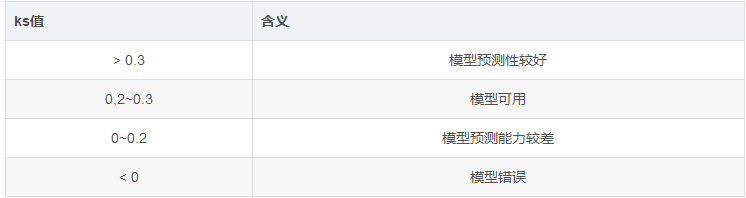

**ks曲线绘制**

In [ ]:
import matlibplot.pyplot as plt
import seaborn as sns
sns.set()

def ks_curve(df, num=10):
    # 防止中文乱码
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus']=False
    ks_value = df['diff'].max()
    # 获取绘制曲线所需要的数据
    x_curve = range(num + 1)
    y_curve1 = [0] + list(df['bad_percent_cum'].values[:-1])
    y_curve2 = [0] + list(df['good_percent_cum'].values[:-1])
    y_curve3 = [0] + list(df['diff'].values[:-1])
    # 获取绘制ks点所需要的数据
    df_ks_max = df[df['diff'] == ks_value]
    x_point = [df_ks_max['rank'].values[0], df_ks_max['rank'].values[0]]
    y_point = [df_ks_max['bad_percent_cum'].values[0], df_ks_max['good_percent_cum'].values[0]]
    # 绘制曲线
    plt.plot(x_curve, y_curve1, label='bad', linewidth=2)
    plt.plot(x_curve, y_curve2, label='good', linewidth=2)
    plt.plot(x_curve, y_curve3, label='diff', linewidth=2)
    # 标记ks
    plt.plot(x_point, y_point, label='ks - {:.2f}'.format(ks_value), color='r', marker='o', markerfacecolor='r', markersize=5)
    plt.scatter(x_point, y_point, color='r')
    plt.legend()
    plt.show()
    return ks_value

In [2]:
result_ks = ks(df, 'label', 'score')
ks_curve(result_ks)

NameError: name 'df' is not defined

roc_curve函数实现
上面说了计算ks其实只用得到关键的两列，而这两列可以通过sklearn.metrics中函数roc_curve直接获取。
下面代码中，ks_value即为ks值。

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds= roc_curve(df.label, df.score)
ks_value = max(fpr-tpr)
# 画图，画出曲线
plt.plot(fpr, label='bad')
plt.plot(tpr, label='good')
plt.plot(fpr-tpr, label='diff')
# 标记ks
x = np.argwhere((fpr-tpr) == ks_value)[0, 0]
plt.plot((x, x), (0, ks_value), label='ks - {:.2f}'.format(ks_value), color='r', marker='o', markerfacecolor='r', markersize=5)
plt.scatter((x, x), (0, ks_value), color='r')
plt.legend()
plt.show()

In [1]:
import numpy as np
np.random.rand(3,11)

array([[0.11681016, 0.30643873, 0.15245682, 0.1567636 , 0.32927335,
        0.60339248, 0.52028705, 0.22547453, 0.21323053, 0.12712172,
        0.7040367 ],
       [0.91992805, 0.84955413, 0.39345842, 0.63123788, 0.48451138,
        0.78784536, 0.70246768, 0.21296298, 0.72675677, 0.05906666,
        0.90253797],
       [0.04203757, 0.4189408 , 0.75141268, 0.84570893, 0.77677815,
        0.22485146, 0.35234257, 0.67905009, 0.44571701, 0.03257003,
        0.80136447]])